# CBOW with PTB Dataset

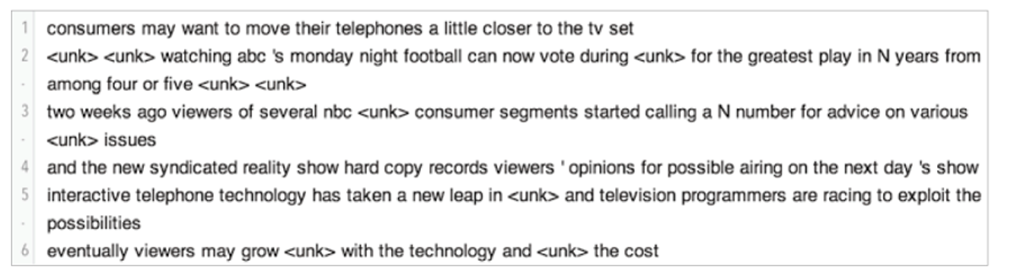

In [15]:
from IPython.display import Image
Image("C:/Users/user/Desktop/Programming/실습/images-20250630T050734Z-1-001/images/PTB 말뭉치.png", width=600)

**nvidia-smi**
-  NVIDIA GPU의 상태를 모니터링하고 관리하는 명령어

In [2]:
!nvidia-smi

Mon Jun 30 14:10:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| 50%   29C    P8              8W /   75W |    1112MiB /   4096MiB |     28%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import warnings
warnings.filterwarnings('ignore', module='requests')

import numpy as np
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

from tensorflow.keras import layers

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. 데이터 다운로드

- 데이터 저장할 디렉토리 생성

In [4]:
!mkdir ptb_dataset

- 데이터 다운로드

In [5]:
# Linux (colab 환경)
# !wget https://raw.githubusercontent.com/tomsercu/lstm/master/data/ptb.train.txt -P ./ptb_dataset

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [6]:
# Windows (로컬 환경)
!curl -o "./ptb_dataset/ptb.train.txt" "https://raw.githubusercontent.com/tomsercu/lstm/master/data/ptb.train.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 4982k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4982k  100 4982k    0     0  7104k      0 --:--:-- --:--:-- --:--:-- 7127k


## 2. 데이터 불러오기

In [7]:
dataset_dir = './ptb_dataset/'
train_file_names = 'ptb.train.txt'

file_path = dataset_dir + train_file_names
file_path

'./ptb_dataset/ptb.train.txt'

#### (1) 맥락과 타깃만들기

In [8]:
def create_contexts_targets(corpus, window_size=1):
    targets = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus) - window_size):
        context = []
        for t in range(-window_size, window_size+1):
            if t == 0:
                continue
            context.append(corpus[idx + t])
        contexts.append(context)
    return np.array(contexts), np.array(targets)

#### (2) 사전 만들기 (word2id, id2word)

In [19]:
words=open(file_path).read().replace('\n','<eos>').strip().split()
words

['aer',
 'banknote',
 'berlitz',
 'calloway',
 'centrust',
 'cluett',
 'fromstein',
 'gitano',
 'guterman',
 'hydro-quebec',
 'ipo',
 'kia',
 'memotec',
 'mlx',
 'nahb',
 'punts',
 'rake',
 'regatta',
 'rubens',
 'sim',
 'snack-food',
 'ssangyong',
 'swapo',
 'wachter',
 '<eos>',
 'pierre',
 '<unk>',
 'N',
 'years',
 'old',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'nov.',
 'N',
 '<eos>',
 'mr.',
 '<unk>',
 'is',
 'chairman',
 'of',
 '<unk>',
 'n.v.',
 'the',
 'dutch',
 'publishing',
 'group',
 '<eos>',
 'rudolph',
 '<unk>',
 'N',
 'years',
 'old',
 'and',
 'former',
 'chairman',
 'of',
 'consolidated',
 'gold',
 'fields',
 'plc',
 'was',
 'named',
 'a',
 'nonexecutive',
 'director',
 'of',
 'this',
 'british',
 'industrial',
 'conglomerate',
 '<eos>',
 'a',
 'form',
 'of',
 'asbestos',
 'once',
 'used',
 'to',
 'make',
 'kent',
 'cigarette',
 'filters',
 'has',
 'caused',
 'a',
 'high',
 'percentage',
 'of',
 'cancer',
 'deaths',
 'among',
 'a',
 

In [9]:
word_to_id = {}
id_to_word = {}

# 말뭉치에 있는 데이터를 단어 단위로 쪼개어 리스트로 보관
words = open(file_path).read().replace('\n', '<eos>').strip().split()

for i, word in enumerate(words):
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

corpus = np.array([word_to_id[w] for w in words])

print('corpus size : ', len(corpus))
print('vocab size : ', len(id_to_word))

corpus size :  929589
vocab size :  10000


In [21]:
word_to_id

{'aer': 0,
 'banknote': 1,
 'berlitz': 2,
 'calloway': 3,
 'centrust': 4,
 'cluett': 5,
 'fromstein': 6,
 'gitano': 7,
 'guterman': 8,
 'hydro-quebec': 9,
 'ipo': 10,
 'kia': 11,
 'memotec': 12,
 'mlx': 13,
 'nahb': 14,
 'punts': 15,
 'rake': 16,
 'regatta': 17,
 'rubens': 18,
 'sim': 19,
 'snack-food': 20,
 'ssangyong': 21,
 'swapo': 22,
 'wachter': 23,
 '<eos>': 24,
 'pierre': 25,
 '<unk>': 26,
 'N': 27,
 'years': 28,
 'old': 29,
 'will': 30,
 'join': 31,
 'the': 32,
 'board': 33,
 'as': 34,
 'a': 35,
 'nonexecutive': 36,
 'director': 37,
 'nov.': 38,
 'mr.': 39,
 'is': 40,
 'chairman': 41,
 'of': 42,
 'n.v.': 43,
 'dutch': 44,
 'publishing': 45,
 'group': 46,
 'rudolph': 47,
 'and': 48,
 'former': 49,
 'consolidated': 50,
 'gold': 51,
 'fields': 52,
 'plc': 53,
 'was': 54,
 'named': 55,
 'this': 56,
 'british': 57,
 'industrial': 58,
 'conglomerate': 59,
 'form': 60,
 'asbestos': 61,
 'once': 62,
 'used': 63,
 'to': 64,
 'make': 65,
 'kent': 66,
 'cigarette': 67,
 'filters': 68,
 'h

In [10]:
window_size = 5
contexts, targets = create_contexts_targets(corpus, window_size)
print("contexts shape:", contexts.shape, "targets shape:", targets.shape)

contexts shape: (929579, 10) targets shape: (929579,)


## 3. 모델 생성

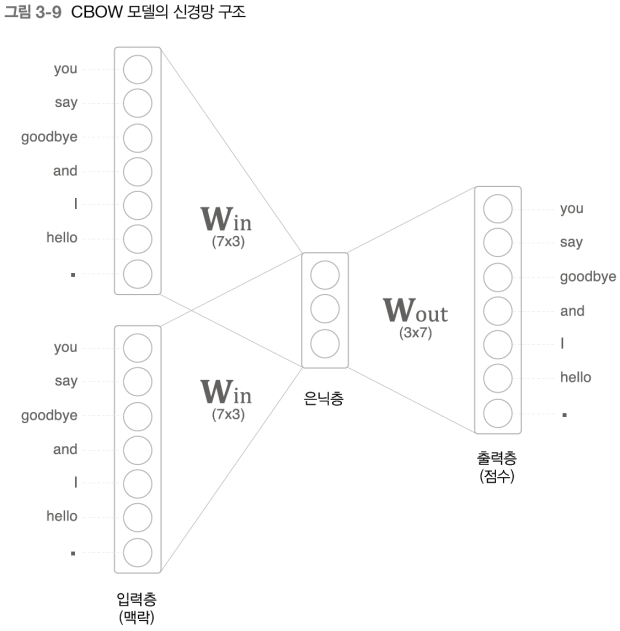

In [16]:
Image('./images/CBOW 신경망 구조.png', width=500)

In [32]:
encoder=tf.keras.Sequential()
encoder.add(tf.keras.Input(shape=(10000,)))
encoder.add(tf.keras.layers.Flatten())
encoder.add(tf.keras.layers.Dense(256))
encoder.add(tf.keras.layers.Dense(64))
encoder.add(tf.keras.layers.Dense(8))
encoder.summary()

decoder=tf.keras.Sequential()
decoder.add(tf.keras.Input(shape=(8,)))
decoder.add(tf.keras.layers.Dense(64))
decoder.add(tf.keras.layers.Dense(256))
decoder.add(tf.keras.layers.Dense(10000,activation='sigmoid'))
decoder.add(tf.keras.layers.Reshape((10000,)))
decoder.summary()

encoder_input=tf.keras.Input(shape=(10000,))
encoder_output=encoder(encoder_input)
decoder_output=decoder(encoder_output)
autoencoder=tf.keras.Model(encoder_input,decoder_output)
autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_21 (Dense)            (None, 256)               2560256   
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 8)                 520       
                                                                 
Total params: 2,577,224
Trainable params: 2,577,224
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)   

VOCAB_SIZE = 10000
EMBEDDING_DIM = 100
MAX_EPOCHS = 15
BATCH_SIZE = 256

#### (1) Keras Sequential API

In [37]:
model1 = tf.keras.Sequential([
    # todo
    layers.Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM,input_length=10),
    layers.Lambda(lambda x:tf.reduce_mean(x,axis=1)), 
    layers.Dense(units=VOCAB_SIZE,activation='softmax')
])
model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss='sparse_categorical_crossentropy',
               metrics=["accuracy"])
history = model1.fit(contexts, targets, epochs=10, batch_size=BATCH_SIZE)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           1000000   
                                                                 
 lambda_1 (Lambda)           (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 10000)             1010000   
                                                                 
Total params: 2,010,000
Trainable params: 2,010,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3632/3632 [==============================] - 32s 9ms/step - loss: 6.5236 - accuracy: 0.0843
Epoch 2/10
3632/3632 [==============================] - 33s 9ms/step - loss: 6.1081 - accuracy: 0.1181
Epoch 3/10
3632/3632 [==============================] - 32s 9ms/step - loss: 5.8473 - accuracy: 0.136

#### (2) Keras Functional API

In [58]:
# todo
inputs=layers.Input(shape=(10,))
embeddings=layers.Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM,input_length=10)(inputs)
means=tf.reduce_mean(embeddings,axis=1)
outputs=layers.Dense(units=VOCAB_SIZE,activation='softmax')(means)
#------------------------------------------------------------------------------------------------#

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model2.summary()

model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss='sparse_categorical_crossentropy',
               metrics=["accuracy"])
history = model2.fit(contexts, targets, epochs=1, batch_size=BATCH_SIZE)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 10)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 10, 100)           1000000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 dense_29 (Dense)            (None, 10000)             1010000   
                                                                 
Total params: 2,010,000
Trainable params: 2,010,000
Non-trainable params: 0
_________________________________________________________________
3632/3632 [==============================] - 32s 9ms/step - loss: 6.5189 - accuracy: 0.0858


#### (3) Keras Custom Model (Subclassing)

In [62]:
class CBOW_Model(tf.keras.Model):
    def __init__(self, vocab_size, embed_dimension):
        super(CBOW_Model, self).__init__()
        # todo
        # 정의
        self.embedding=layers.Embedding(input_dim=vocab_size, output_dim=embed_dimension,input_length=10)
        self.output_layer=layers.Dense(units=vocab_size,activation='softmax')
    def call(self, inputs):
        # todo
        # 실제 데이터입력 수행
        embedding=self.embedding(inputs)
        mean=tf.reduce_mean(embedding,axis=1)
        outputs=self.output_layer(mean)
        return outputs

In [63]:
model3 = CBOW_Model(vocab_size=VOCAB_SIZE , embed_dimension=EMBEDDING_DIM)
model3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss='sparse_categorical_crossentropy',
               metrics=["accuracy"])
history = model3.fit(contexts, targets, epochs=1, batch_size=BATCH_SIZE)

3632/3632 [==============================] - 32s 9ms/step - loss: 6.5193 - accuracy: 0.0854


In [65]:
model3.summary()

Model: "cbow__model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  1000000   
                                                                 
 dense_30 (Dense)            multiple                  1010000   
                                                                 
Total params: 2,010,000
Trainable params: 2,010,000
Non-trainable params: 0
_________________________________________________________________


#### (4) Keras Custom Layer

In [64]:
class CustomLayer(layers.Layer):
    def __init__(self, vocab_size):
        # 초기화
        super(CustomLayer, self).__init__()
        self.vocab_size = vocab_size

    def build(self, input_shape):
        # 레이어 정의
        self.output_layer = layers.Dense(units = self.vocab_size, activation="softmax" )

    def call(self, inputs):
        # 데이터의 입출력 흐름
        outputs = self.output_layer(inputs)
        return outputs


In [66]:
class CBOW_Model(tf.keras.Model):
    def __init__(self, vocab_size, embed_dimension):
        super(CBOW_Model, self).__init__()
        self.embedding = layers.Embedding(input_dim=vocab_size, output_dim=embed_dimension, input_length=10)
        self.output_layer = CustomLayer(vocab_size)

    def call(self, inputs):
        embedding = self.embedding(inputs)
        mean = tf.reduce_mean(embedding, axis=1)
        outputs = self.output_layer(mean)

        return outputs

In [67]:
model4 = CBOW_Model(vocab_size=VOCAB_SIZE , embed_dimension=EMBEDDING_DIM)

## 4. 모델 컴파일 (손실함수, 옵티마이저 선택)

- sparse_categorical_crossentropy : 다중 분류 문제에 정수 형태 레이블 다룰 때

- categorical_crossentorpy : 다중 분류 문제에 원핫 인코딩된 레이블 다룰 때

- binary_crossentropy : 이진 분류 문제를 다룰 때

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss='sparse_categorical_crossentropy',
               metrics=["accuracy"])

## 5. 모델 훈련

In [38]:
history = model1.fit(contexts, targets, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.9187 - accuracy: 0.1950
Epoch 2/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.8492 - accuracy: 0.1982
Epoch 3/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.7847 - accuracy: 0.2018
Epoch 4/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.7239 - accuracy: 0.2046
Epoch 5/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.6666 - accuracy: 0.2075
Epoch 6/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.6129 - accuracy: 0.2104
Epoch 7/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.5619 - accuracy: 0.2132
Epoch 8/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.5141 - accuracy: 0.2157
Epoch 9/15
3632/3632 [==============================] - 33s 9ms/step - loss: 4.4685 - accuracy: 0.2182
Epoch 10/15
3632/3632 [==============================] - 33s 9ms/step - l

## 6. 유사도 측정

In [39]:
def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출
    의미가 비슷한 단어 정의-각 단어를 함수로 표현하고 기울기(각도) 차이를 코사인화해서 계산함
    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 벡터 준비
x = np.array([1, 2, 3]) # 임베딩벡터(단어의 분산 표현)-예: dog
y = np.array([4, 5, 6]) # 예: dogs

# 코사인 유사도 계산
similarity = cosine_similarity([x], [y])[0][0]
print(similarity)


0.9746318461970762


In [53]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼낸다
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        #similarity[i] = cos_similarity(word_matrix[i], query_vec)
        similarity[i] = cosine_similarity([word_matrix[i]], [query_vec])

    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [55]:
embeddings = model1.layers[0].get_weights()[0]
embeddings.shape

(10000, 100)

In [56]:
word_vecs = embeddings

querys = ['you', 'year', 'car', 'toyota']

for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 we: 0.6857713460922241
 i: 0.6331820487976074
 they: 0.5785608291625977
 your: 0.5277903079986572
 weird: 0.5247077345848083

[query] year
 month: 0.7509618997573853
 week: 0.6596051454544067
 decade: 0.638242244720459
 spring: 0.6310237646102905
 summer: 0.6271064281463623

[query] car
 auto: 0.5193303823471069
 merkur: 0.51926189661026
 cars: 0.4694196283817291
 sedan: 0.4551323652267456
 honda: 0.42048266530036926

[query] toyota
 mazda: 0.5371774435043335
 cars: 0.513569712638855
 ford: 0.5040841102600098
 nissan: 0.49768543243408203
 minivans: 0.49121811985969543


## 7. 시각화

Embedding projector https://projector.tensorflow.org/ 를 이용하여 word embedding 시각화

In [57]:
out_v = open('vects.tsv', 'w', encoding='utf-8')
out_m = open('meta.tsv', 'w', encoding='utf-8')

for i in range(1, 1000):
    word = id_to_word.get(i, '?')
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in word_vecs[i]]) + '\n')

out_v.close()
out_m.close()

# 실행하고 위 사이트 들어가보면 시각화됨